In [73]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [74]:
countries = ['Poland', 'Lithuania', 'Latvia', 'Estonia']
df_DA_PLBAL = df_altered[(df_altered['job_country'].isin(countries)) & (df_altered['job_title_short']=='Data Analyst')].copy()

In [75]:
df_DA_PLBAL = df_DA_PLBAL.dropna(subset=['salary_year_avg'])
df_DA_PLBAL_exploded = df_DA_PLBAL.explode('job_skills')


In [76]:
df_DA_skills = df_DA_PLBAL_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'salary_median'})
df_job_count = len(df_DA_PLBAL)

In [77]:
df_DA_skills['skill_prc'] = df_DA_skills['skill_count'] / df_job_count*100

In [78]:
skill_percent = 5

In [79]:
df_DA_skill_high_deman = df_DA_skills[df_DA_skills['skill_prc']> skill_percent]

In [81]:
df_technology = df_altered['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'datarobot',
  'looker',
  'spss',
  'sap',
  'ssis',
  'sheets',
  'esquisse',
  'word',
  'powerbi',
  'cognos',
  'outlook',
  'sharepoint',
  'power bi',
  'tableau',
  'spreadsheet',
  'powerpoint',
  'microstrategy',
  'ms access',
  'sas',
  'visio',
  'excel',
  'msaccess',
  'qlik',
  'ssrs',
  'splunk',
  'nuix',
  'dax'],
 'programming': ['perl',
  'no-sql',
  'clojure',
  'swift',
  'lua',
  'f#',
  'nosql',
  'julia',
  'rust',
  'sql',
  'shell',
  'matlab',
  'erlang',
  'html',
  'c#',
  'powershell',
  't-sql',
  'crystal',
  'visualbasic',
  'ruby',
  'mongodb',
  'delphi',
  'sass',
  'go',
  'groovy',
  'dart',
  'php',
  'scala',
  'c++',
  'pascal',
  'java',
  'fortran',
  'cobol',
  'c',
  'css',
  'assembly',
  'bash',
  'ocaml',
  'mongo',
  'sas',
  'python',
  'visual basic',
  'solidity',
  'lisp',
  'elixir',
  'haskell',
  'vba',
  'golang',
  'typescript',
  'vb.net',
  'javascript',
  'kotlin',
  'objective-c',
  'r',
  '

In [82]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,datarobot
0,analyst_tools,looker
0,analyst_tools,spss
0,analyst_tools,sap
...,...,...
9,sync,webex
9,sync,microsoft teams
9,sync,wire
9,sync,rocketchat


In [83]:
df_plot = df_DA_skill_high_deman.merge(df_technology, left_on='job_skills', right_on='skills')

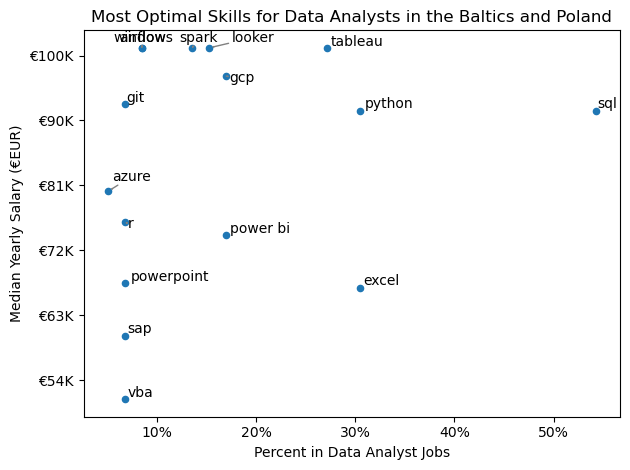

In [85]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text
df_DA_skill_high_deman.plot(kind='scatter', x='skill_prc', y = 'salary_median')
texts = []
for i, txt in enumerate(df_DA_skill_high_deman.index): 
    texts.append(plt.text(df_DA_skill_high_deman['skill_prc'].iloc[i], df_DA_skill_high_deman['salary_median'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: f'€{int(y/1100)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent in Data Analyst Jobs') 
plt.ylabel('Median Yearly Salary (€EUR)') 
plt.title(f'Most Optimal Skills for Data Analysts in the Baltics and Poland')
plt.tight_layout() 
plt.show()

In [ ]:
df_plot = df_plot.set_index('skills')

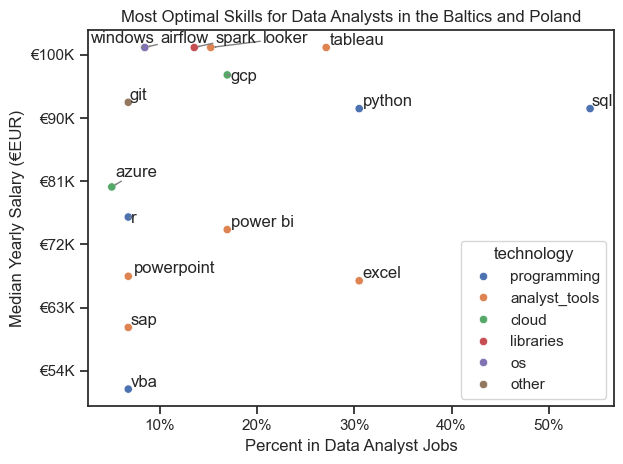

In [97]:

from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text
#df_plot.plot(kind='scatter', x='skill_prc', y = 'salary_median')
sns.despine() 
sns.set_theme(style='ticks')
sns.scatterplot(
    data=df_plot,
    x='skill_prc',
    y = 'salary_median',
    hue='technology'         
                )
texts = []
for i, txt in enumerate(df_plot.index): 
    texts.append(plt.text(df_plot['skill_prc'].iloc[i], df_plot['salary_median'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: f'€{int(y/1100)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent in Data Analyst Jobs') 
plt.ylabel('Median Yearly Salary (€EUR)') 
plt.title(f'Most Optimal Skills for Data Analysts in the Baltics and Poland')
plt.tight_layout() 
plt.show()